In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append('/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime-detection')

In [6]:
from regime_detection_jump2 import regime_detection_jump
from exploratory_data_analysis import financial_data

[*********************100%%**********************]  1 of 1 completed
Final Model Performance on Test Data: 0.5227459101696279


/Users/elliebae/Documents/Senior Thesis/senior-thesis-1/regime_detection_jump2.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['regimes'] = regime_labels


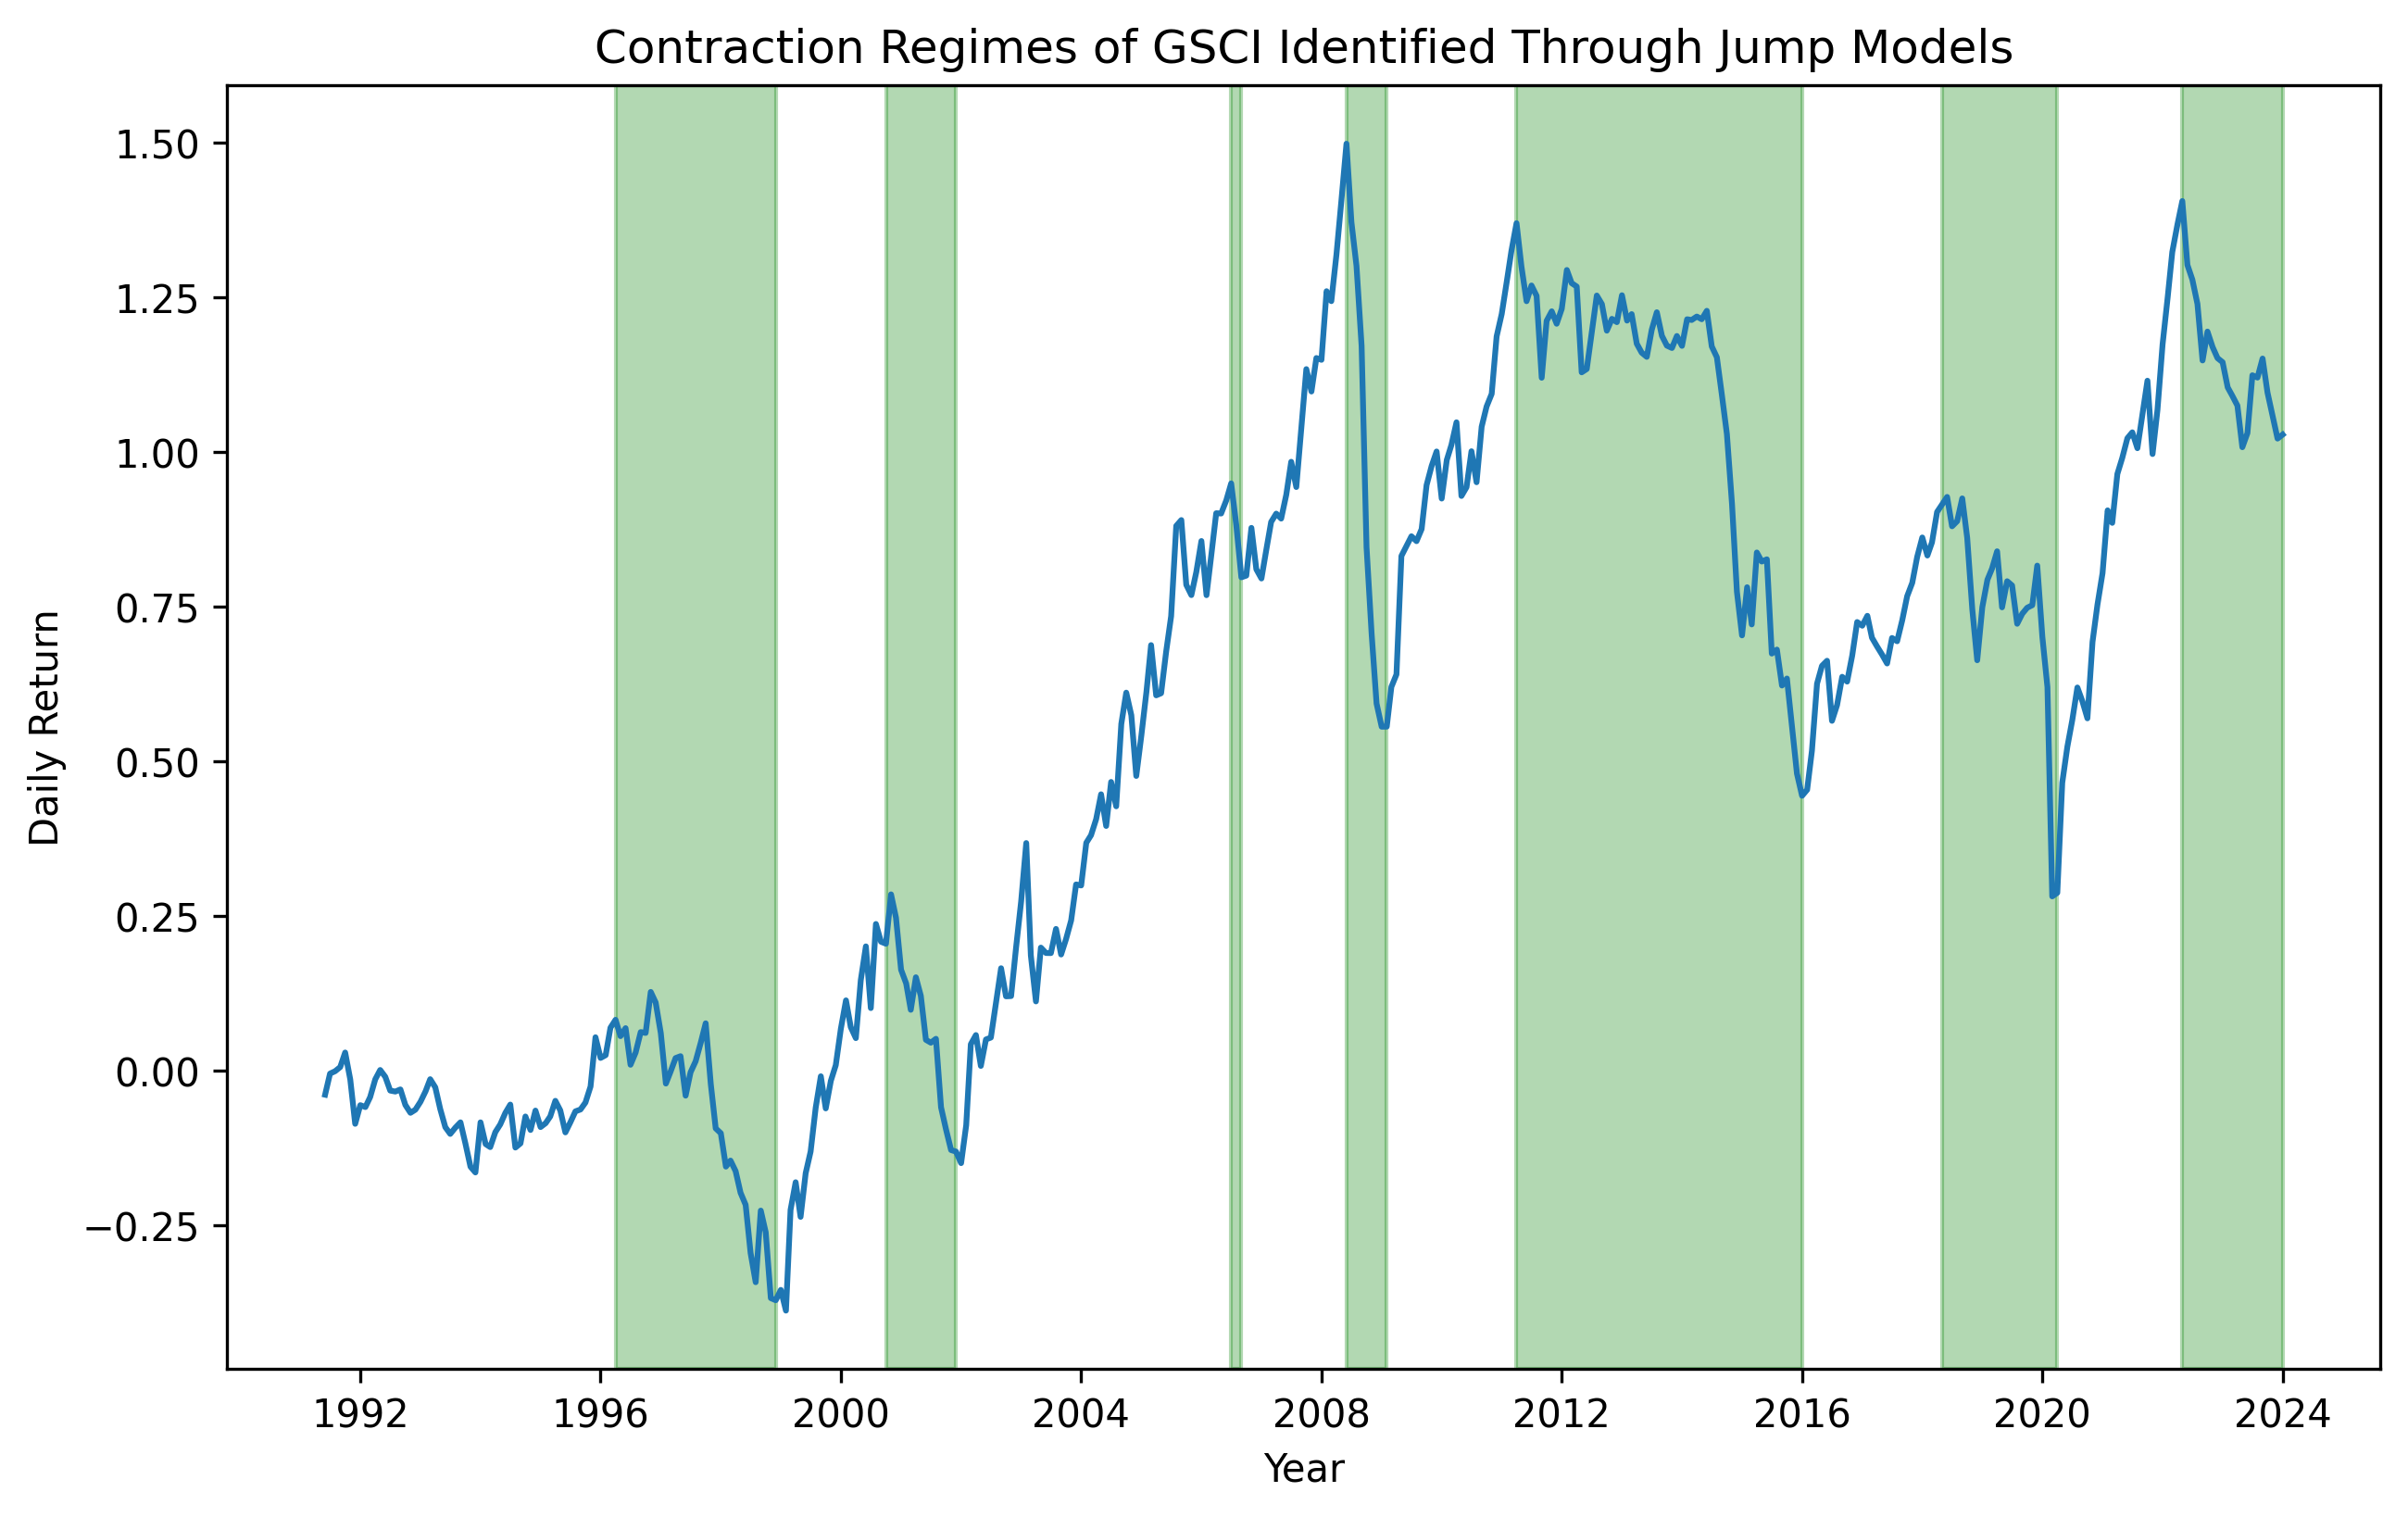

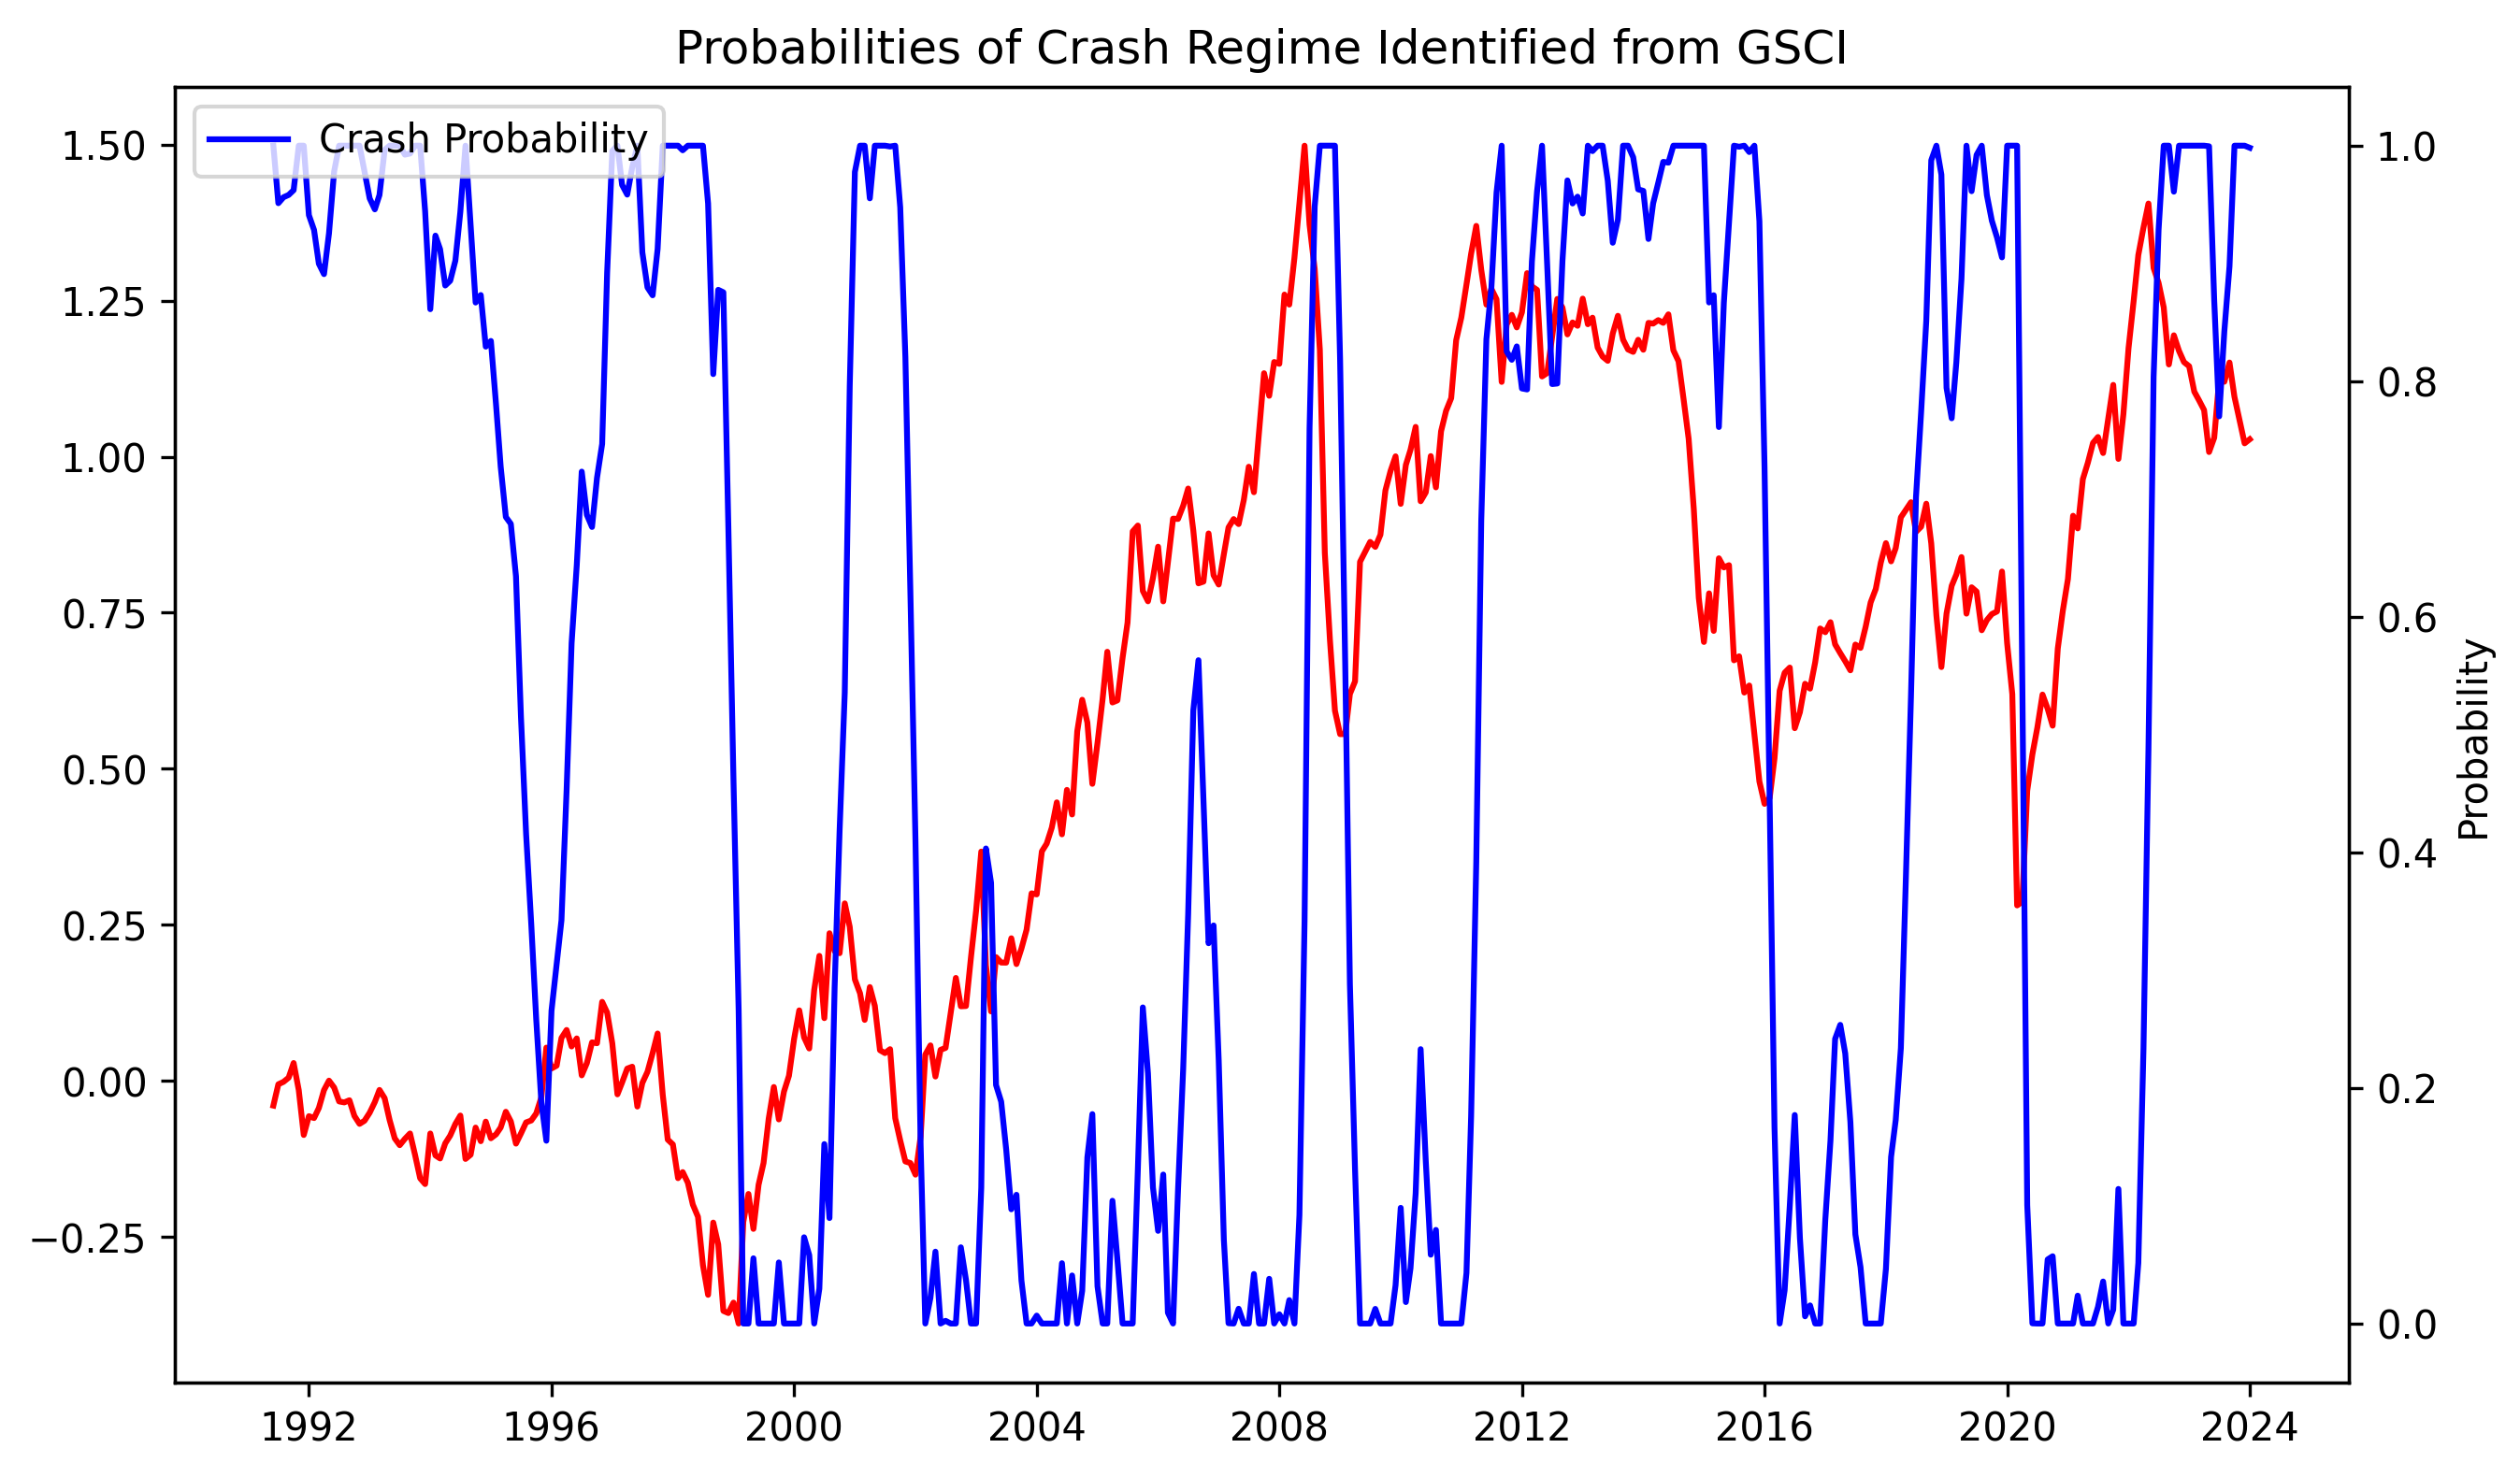

In [7]:
# # Use yfinance to fetch data
ticker = "^SPGSCI"
start_date = "1991-05-01"
interval = "1mo"

# Example usage:

dbc_ticker = "DBC"
start_date_dbc = "2006-02-03"

gsci = financial_data(ticker, start_date, interval)
model_gsci = regime_detection_jump(gsci, K=2, lambd=0.05)
model_gsci.split_data(train_size=0.8)

dbc = financial_data(dbc_ticker, start_date_dbc, interval)
model_dbc = regime_detection_jump(dbc, K=2, lambd=0.03)
model_dbc.split_data(train_size=0.8)

# lambda_values = [0.05]
# model.cross_validation(lambda_values, k=10)

model_gsci.test_model()
model_gsci.plot_regimes()

model_dbc.test_model()
model_dbc.plot_regimes()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


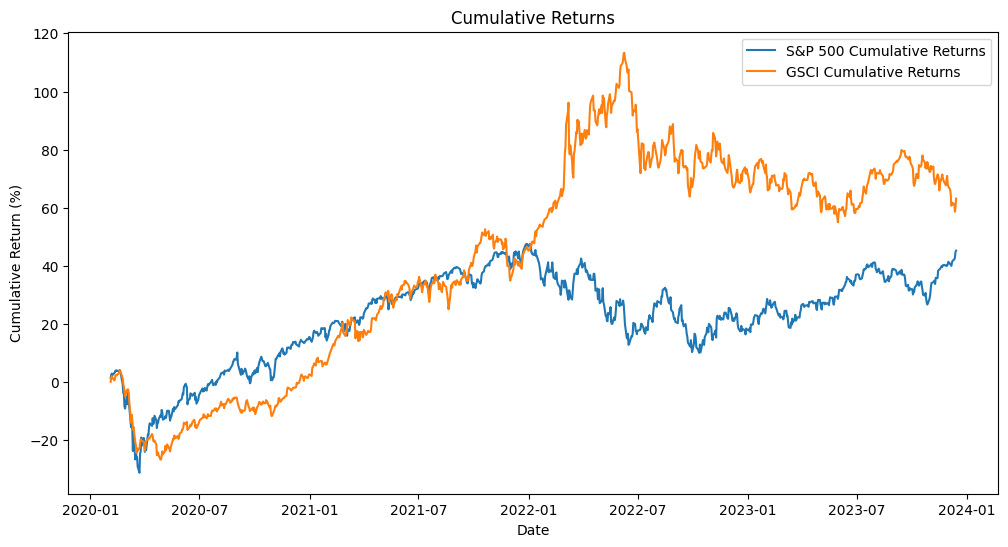

In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and the start date
sp500_ticker = "^GSPC"  # Ticker for S&P 500
gsci_ticker = "DBC"     # An ETF approximating GSCI
start_date = "2020-02-01"

# Fetch the historical data from Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date)['Adj Close']
gsci_data = yf.download(gsci_ticker, start=start_date)['Adj Close']

# Calculate daily returns in percentage
sp500_returns = sp500_data.pct_change().dropna()
gsci_returns = gsci_data.pct_change().dropna()

# Calculate cumulative returns
sp500_cumulative = ((1 + sp500_returns).cumprod() - 1)*100
gsci_cumulative = ((1 + gsci_returns).cumprod() - 1)*100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sp500_cumulative, label='S&P 500 Cumulative Returns')
plt.plot(gsci_cumulative, label='GSCI Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the tickers
sp500_ticker = "^GSPC"  # Ticker for S&P 500
gsci_ticker = "DBC"     # An ETF approximating GSCI

# Define the start date and end date
start_date = "2020-02-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch the historical data from Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)['Adj Close']
gsci_data = yf.download(gsci_ticker, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
sp500_daily_returns = sp500_data.pct_change().dropna()
gsci_daily_returns = gsci_data.pct_change().dropna()

# Calculate the number of years in the period
number_of_years = (sp500_data.index[-1] - sp500_data.index[0]).days / 365.25

# Calculate the annualized return for SP500 and GSCI
sp500_annualized_return = (sp500_data[-1] / sp500_data[0]) ** (1 / number_of_years) - 1
gsci_annualized_return = (gsci_data[-1] / gsci_data[0]) ** (1 / number_of_years) - 1

# Calculate annual standard deviation
annual_trading_days = 252
sp500_annual_std = sp500_daily_returns.std() * (annual_trading_days ** 0.5)
gsci_annual_std = gsci_daily_returns.std() * (annual_trading_days ** 0.5)

# Output the results
print(f"Annualized Return for S&P 500 from 1991-05-01 to Present: {sp500_annualized_return * 100:.2f}%")
print(f"Annualized Return for DBC from 1991-05-01 to Present: {gsci_annualized_return * 100:.2f}%")
print(f"Annual Standard Deviation for S&P 500: {sp500_annual_std * 100:.2f}%")
print(f"Annual Standard Deviation for DBC: {gsci_annual_std * 100:.2f}%")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Annualized Return for S&P 500 from 1991-05-01 to Present: 10.09%
Annualized Return for DBC from 1991-05-01 to Present: 13.05%
Annual Standard Deviation for S&P 500: 23.31%
Annual Standard Deviation for DBC: 21.43%


/var/folders/5f/qczwdzcx47q3t2kyf3jdp5gh0000gn/T/ipykernel_33339/567703807.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_annualized_return = (sp500_data[-1] / sp500_data[0]) ** (1 / number_of_years) - 1
/var/folders/5f/qczwdzcx47q3t2kyf3jdp5gh0000gn/T/ipykernel_33339/567703807.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gsci_annualized_return = (gsci_data[-1] / gsci_data[0]) ** (1 / number_of_years) - 1


In [32]:
import pandas as pd
import yfinance as yf

# Define the tickers
sp500_ticker = "^GSPC"  # Ticker for S&P 500
gsci_ticker = "DBC"     # An ETF approximating GSCI

# Define the start date
start_date = "2020-02-01"

# Fetch the historical data from Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date)['Adj Close']
gsci_data = yf.download(gsci_ticker, start=start_date)['Adj Close']

# Calculate daily returns
sp500_returns = sp500_data.pct_change().dropna()
gsci_returns = gsci_data.pct_change().dropna()

# Combine the returns into a single DataFrame
combined_returns = pd.DataFrame({
    'SP500_Returns': sp500_returns,
    'GSCI_Returns': gsci_returns
})

# Calculate correlation of daily returns
correlation = combined_returns['SP500_Returns'].corr(combined_returns['GSCI_Returns'])

# Print the correlation
print("Correlation between S&P 500 and DBC Returns:", correlation)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Correlation between S&P 500 and DBC Returns: 0.366945327330708
